In [19]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

columns = [
            'dport', 'sport','protocol', 'flags', 'time bw prev packet','spkts','dpkts' ,'pkt_len','ttl', 'payload size', 'label'
        ]

dataset = pd.read_csv('../datasets/dataset.csv')
dataset.head()

,dport,sport,protocol,flags,time bw prev packet,spkts,dpkts,pkt_len,ttl,payload size,label
0,50053,443,6,A,1.714098e+09,0,1460,1440,60,248,benign
1,443,50053,6,A,2.000093e-03,20,0,0,128,248,benign
2,50055,443,6,A,2.000809e-03,0,1460,1440,61,248,benign
3,443,50055,6,A,1.999855e-03,56,0,0,128,248,benign
4,50057,443,6,A,2.000093e-03,0,1460,1440,60,248,benign


In [20]:
if mixed_dtypes := {c: dtype for c in dataset.columns if (dtype := pd.api.types.infer_dtype(dataset[c])).startswith("mixed")}:
    print(f"Columns with mixed data types: {mixed_dtypes}")


In [21]:
# Replace 'nan' values with -1

dataset.fillna({'flags':'9'}, inplace=True)
dataset

,dport,sport,protocol,flags,time bw prev packet,spkts,dpkts,pkt_len,ttl,payload size,label
0,50053,443,6,A,1.714098e+09,0,1460,1440,60,248,benign
1,443,50053,6,A,2.000093e-03,20,0,0,128,248,benign
2,50055,443,6,A,2.000809e-03,0,1460,1440,61,248,benign
3,443,50055,6,A,1.999855e-03,56,0,0,128,248,benign
4,50057,443,6,A,2.000093e-03,0,1460,1440,60,248,benign
...,...,...,...,...,...,...,...,...,...,...,...
389886,3240,36657,6,S,1.001930e-02,0,26,2,48,248,nmap
389887,42216,36657,6,S,1.999855e-03,0,26,2,41,248,nmap
389888,42216,36657,6,S,4.500389e-03,0,26,2,41,248,nmap
389889,28478,36657,6,S,2.504349e-03,0,26,2,57,248,nmap


In [22]:
dataset[dataset['flags'].isna()] # No values are NaN now

,dport,sport,protocol,flags,time bw prev packet,spkts,dpkts,pkt_len,ttl,payload size,label


In [24]:
# We need to perform one hot encoding the flags parameter

def flags_to_encode(tcp_flags: str) -> int:
    if tcp_flags == '':
        print('empty string found')
    flag_mapping = {
        'F': '8',
        'S': '1',
        'R': '2',
        'P': '3',
        'A': '4',
        'U': '5',
        'E': '6',
        'C': '7',
        '0': '0',
        '9': '9'
    }
    list_of_flags = list()
    try:
        list_of_flags = list(tcp_flags)
    except:
        print(tcp_flags)
    encoded_flag = ''
    for flag in list_of_flags:
        encoded_flag += flag_mapping[flag]
    
    return int(encoded_flag)

dataset['flags'] = dataset['flags'].apply(flags_to_encode)

In [25]:
# Getting data and label
X = dataset[columns[:-1]] # exclude the last column
y = dataset.label
X.head()

,dport,sport,protocol,flags,time bw prev packet,spkts,dpkts,pkt_len,ttl,payload size
0,50053,443,6,4,1.714098e+09,0,1460,1440,60,248
1,443,50053,6,4,2.000093e-03,20,0,0,128,248
2,50055,443,6,4,2.000809e-03,0,1460,1440,61,248
3,443,50055,6,4,1.999855e-03,56,0,0,128,248
4,50057,443,6,4,2.000093e-03,0,1460,1440,60,248


In [26]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X.head(20)

,dport,sport,protocol,flags,time bw prev packet,spkts,dpkts,pkt_len,ttl,payload size
0,50053,443,6,4,1.714098e+09,0,1460,1440,60,248
1,443,50053,6,4,2.000093e-03,20,0,0,128,248
2,50055,443,6,4,2.000809e-03,0,1460,1440,61,248
3,443,50055,6,4,1.999855e-03,56,0,0,128,248
4,50057,443,6,4,2.000093e-03,0,1460,1440,60,248
5,443,50057,6,4,2.066851e-03,20,0,0,128,248
6,50056,443,6,4,2.000809e-03,0,1460,1440,61,248
7,443,50056,6,4,1.000166e-03,32,0,0,128,248
8,50058,443,6,4,2.155542e-03,0,1460,1440,61,248
9,443,50058,6,4,1.000166e-03,32,0,0,128,248


In [27]:
# Building the decision tree
model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

In [28]:
# Model evaluation

print(f'Accuracy: {metrics.accuracy_score(y_test,y_pred)}')

Accuracy: 0.9999658026126804


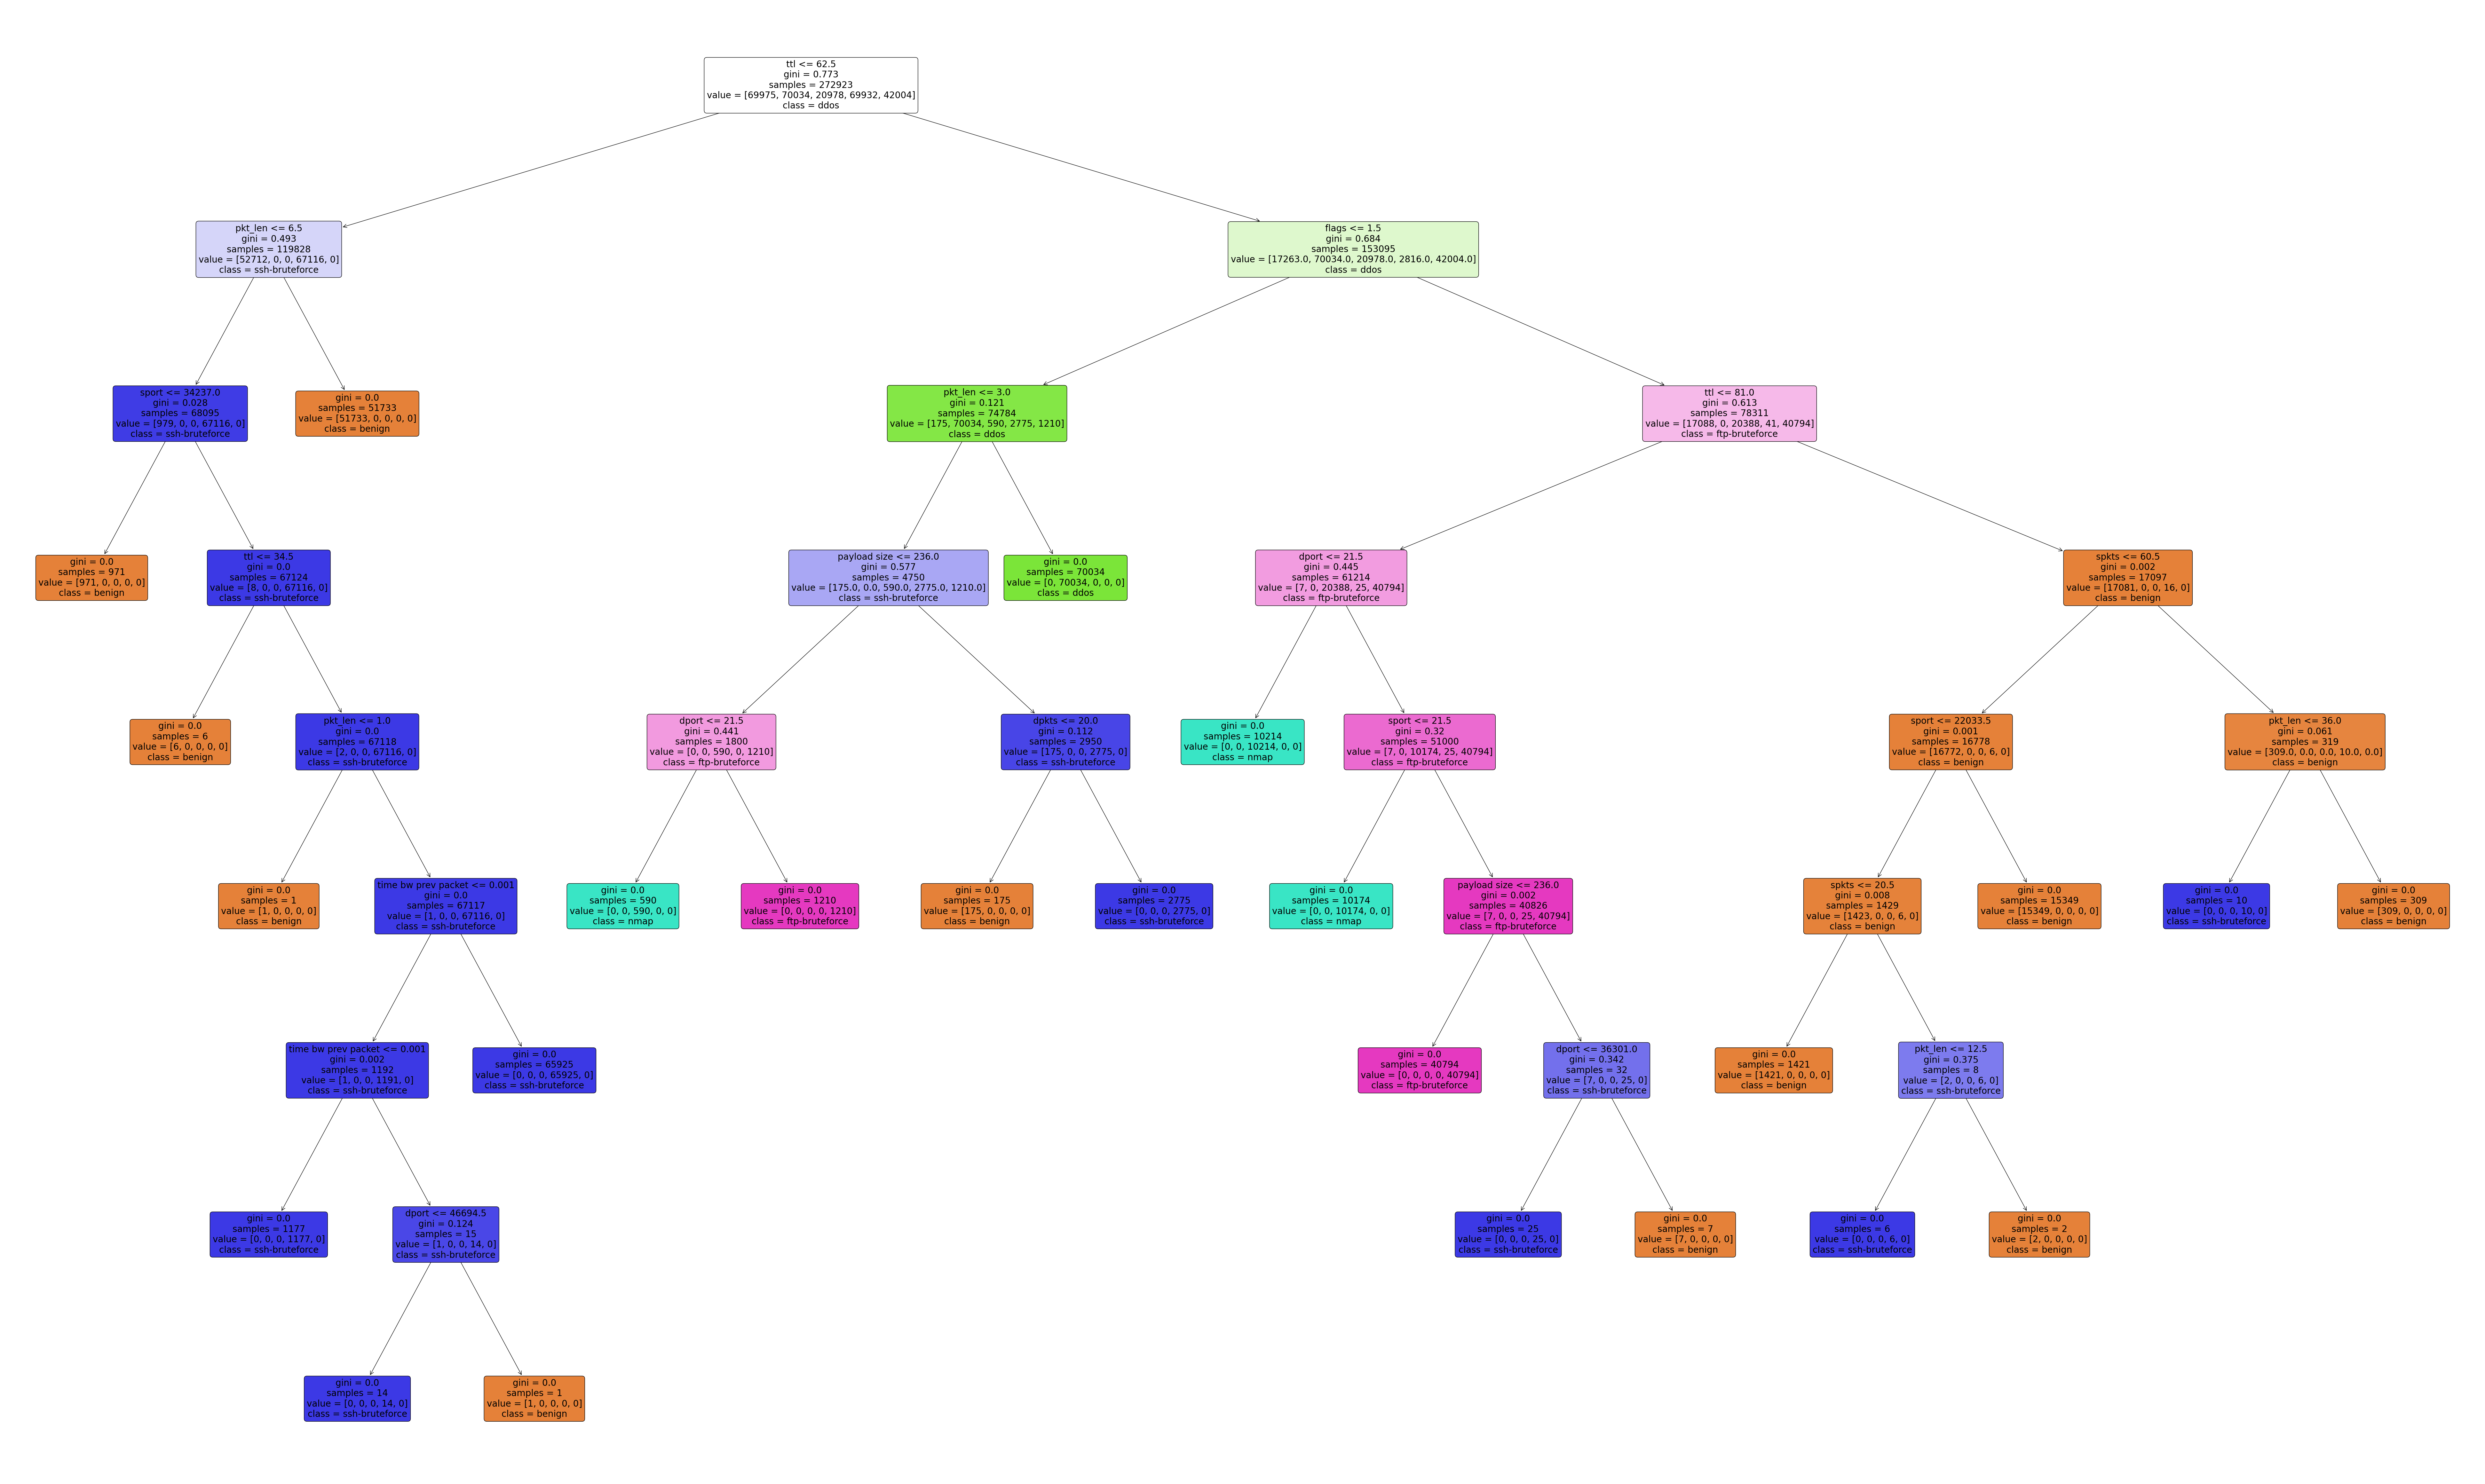

In [53]:
# Visualizing the tree
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(100, 60))  # Higher DPI for

_ = plot_tree(decision_tree=model, 
              feature_names=columns[:-1],
              class_names=['benign', 'ddos', 'nmap', 'ssh-bruteforce', 'ftp-bruteforce'],
              filled=True, rounded=True, fontsize=20)
plt.savefig('decision_tree.png')
plt.show()

In [58]:
from sklearn.tree import export_graphviz
import pydot
export_graphviz(model, out_file=open('tree.dot', 'w'), feature_names=columns[:-1],
                filled=True, rounded=True)
(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('dt_tree.png')

FileNotFoundError: [WinError 2] "dot" not found in path.

In [31]:
from joblib import dump

dump(model, 'dt_classifier.pkl')

['dt_classifier.pkl']

In [32]:
len(dataset.index)

389891